In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import qrcode
%matplotlib inline 

In [2]:
img_list = [cv2.imread(img_path, 1) for img_path in glob("./data/original/*.jpg")]

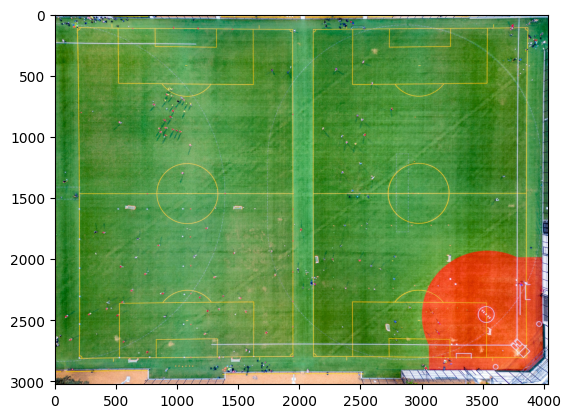

In [3]:
# reads image 'opencv-logo.png' as grayscale
plt.imshow(cv2.cvtColor(img_list[1], cv2.COLOR_BGR2RGB))

In [4]:
down_width = 1920
down_height = 1080
down_points = (down_width, down_height)
img_list = [cv2.resize(img_list[idx], down_points, interpolation= cv2.INTER_LINEAR) for idx, _ in enumerate(img_list)]

In [5]:
img_list[1].shape

(1080, 1920, 3)

In [6]:
img_arr = np.array(img_list)
img_arr.shape

(3, 1080, 1920, 3)

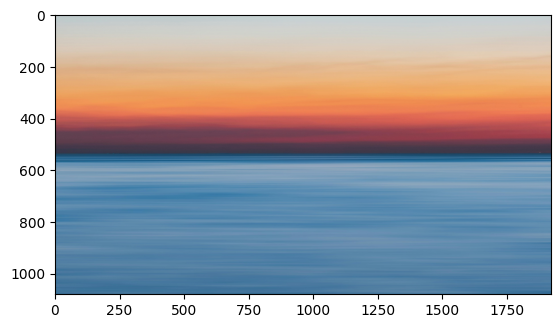

In [7]:
# reads image 'opencv-logo.png' as grayscale
plt.imshow(cv2.cvtColor(img_arr[2], cv2.COLOR_BGR2RGB))

In [8]:
uuid = "7b1f9397-f815-4c1a-b08d-7538fb7402ef"

In [41]:

qr = qrcode.QRCode(
    version=1,
    box_size=10,
    border=0,
)
qr.add_data(uuid)
qr.make(fit=True)
qr = qr.make_image(fill_color="black", back_color="white")
qr = np.asarray(qr)
qr = np.where(qr, 0,2)
qr = cv2.resize(qr, (256,256), interpolation=cv2.INTER_NEAREST)
qr.shape

(256, 256)

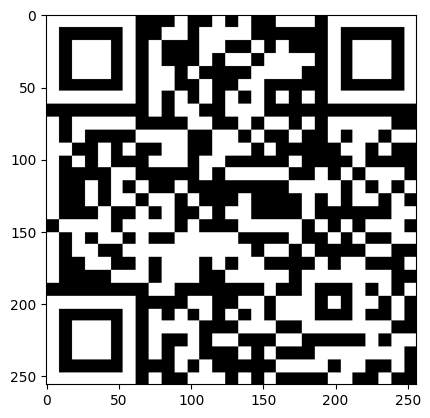

In [42]:
plt.imshow(qr, cmap='grey')

In [43]:
top = bottom = (img_arr[0].shape[0]//2)-(qr.shape[0]//2) 
left = right = (img_arr[0].shape[1]//2)-(qr.shape[1]//2)

In [44]:
pad_qrcode = cv2.copyMakeBorder(qr, top, bottom, left, right, cv2.BORDER_CONSTANT)
pad_qrcode.shape

(1080, 1920)

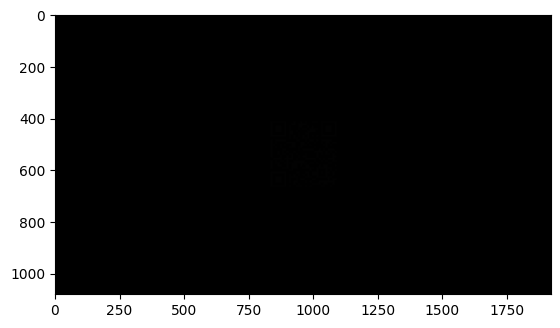

In [45]:
pad_qrcode = cv2.merge([pad_qrcode,pad_qrcode,pad_qrcode])
plt.imshow(pad_qrcode)

In [62]:
sum_img = (img_arr[2]+pad_qrcode).astype(np.uint8)
sum_img.shape

(1080, 1920, 3)

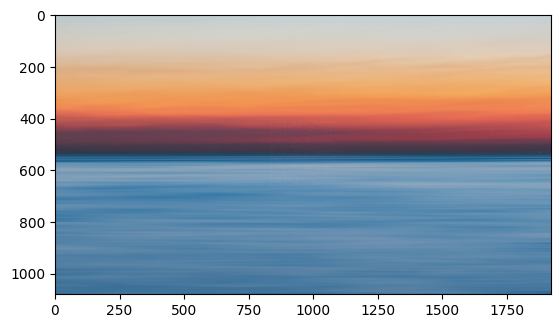

In [63]:
plt.imshow(cv2.cvtColor(sum_img, cv2.COLOR_BGR2RGB))

In [60]:
cv2.imwrite('./data/signed/forest.jpg',sum_img)

True

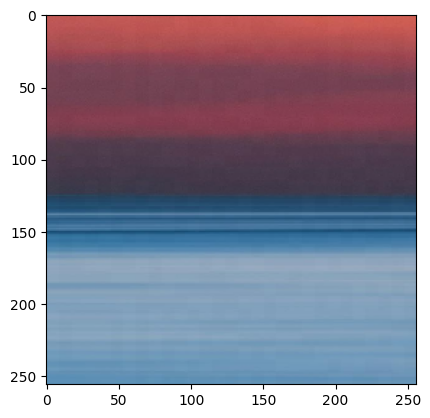

In [64]:
plt.imshow(cv2.cvtColor(sum_img[top:top+256,left:left+256,:], cv2.COLOR_BGR2RGB))

In [65]:
cv2.imwrite('./data/signed/roi_horizon.jpg',sum_img[top:top+256,left:left+256,:])

True